In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [20]:
np.random.seed(320)
x_train = np.linspace(-1,1,50)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

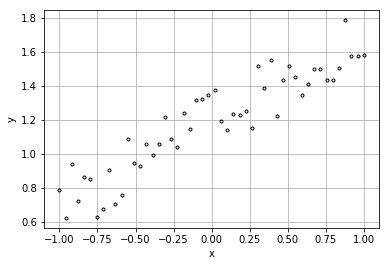

In [3]:
plt.plot(x_train,y_train,'.k',
         markerfacecolor='none')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
w = tf.Variable(tf.ones([1,1]), dtype=tf.float32)
b = tf.Variable(tf.ones([1]), dtype=tf.float32)

x = tf.placeholder(tf.float32, [None,1])

yhat = tf.matmul(x,w)+b

In [16]:
y = tf.placeholder(tf.float32, [None,1])

loss = tf.reduce_mean(tf.square(yhat-y))

In [17]:
MaxEpoch = 25
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [21]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w,b,loss],feed_dict={x:x_train,y:y_train})
            print(curr_w, curr_b, curr_loss)
        sess.run(train, feed_dict={x:x_train,
                                   y:y_train})
    w_tf_gd, b_tf_gd = sess.run([w,b])

[[1.]] [1.] 0.1524815
[[0.66522515]] [1.1854535] 0.028151726
[[0.53608906]] [1.1912489] 0.015063959
[[0.4862761]] [1.19143] 0.013121848
[[0.46706128]] [1.1914357] 0.012832876


In [22]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        sess.run(train, feed_dict={x:x_train,
                                   y:y_train})
    w_tf_gd, b_tf_gd = sess.run([w,b])

In [25]:
np.random.seed(320)
shuffled_id = np.arange(0,len(x_train))
np.random.shuffle(suffled_id)
shuffled_x_train = x_train[shuffled_id]
shuffled_y_train = y_train[shuffled_id]

In [26]:
from helper import generate_batches
batch_size = 5
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w,b,loss],feed_dict={x:x_train,y:y_train})
            print(curr_w, curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch,
                                      y:y_batch})
                            
    w_tf_gd, b_tf_gd = sess.run([w,b])
    

[[1.]] [1.] 0.1524815
[[0.44106284]] [1.1961542] 0.012871967
[[0.44105542]] [1.1961608] 0.012872101
[[0.44105542]] [1.1961609] 0.012872103
[[0.44105542]] [1.1961608] 0.012872101
